In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from lbow.twoDimensional.steadystate import HalfPlaneModel

# Analytical solution of the flow over a bell-shaped mountain with circular contours (hydrostatic assumption)

This notebook shows how to calculate the semi-analytical solution of the uniform, stratified flow over a two-dimensional bell-shaped hill with circular contours under the hydrostatic assumptio. The semi-analytical solution is obtained with LBoW, which solves linear theory of buoyancy waves.

Copyright 2022 Dries Allaerts

Licensed under the Apache License, Version 2.0.

## Set-up

### Input parameters

Flow parameters: wind speed U and Brunt Vaisala frequency N

In [3]:
U = 10   # Wind speed x-component [m/s]
V = 0   # Wind speed x-component [m/s]
N = 0.1 # Brunt-Vaisala frequency [1/s]

Hill shape $h\left(x,y\right) = \large\frac{h_{max}}{\left(\frac{x^2+y^2}{L^2}+1\right)^{3/2}}$


In [4]:
L = 1000.0   # Characteristic width of the hill [m]
hmax = 10.0 # Height of the hill [m]

# Shape function of the hill
h = lambda x,y: hmax/((x**2+y**2)/L**2+1)**(3/2)

Numerical parameters

In [5]:
Lx = 2000.0e3 # Length of the numerical domain [m]
Nx = int(2e4) # Number of grid points

In [6]:
Ly = 100.0e3 # Length of the numerical domain [m]
Ny = int(1e3) # Number of grid points

Parameters for visualization

In [7]:
zs = np.array([0.125,0.25,0.5,1])*np.pi*U/N

### Numerical grid

In [8]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 100.0 m


In [9]:
ys,dy = np.linspace(-Ly/2,Ly/2,Ny,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dy))

Horizontal grid resolution is 100.0 m


In [10]:
Xs,Ys = np.meshgrid(xs,ys,indexing='xy') #Choosing 'xy' instead of 'ij' as we have more grid points in the x direction

### Model

In [11]:
model = HalfPlaneModel(Xs,Ys,h(Xs,Ys),U,V,N,hydrostatic=True)

### Visualize hill

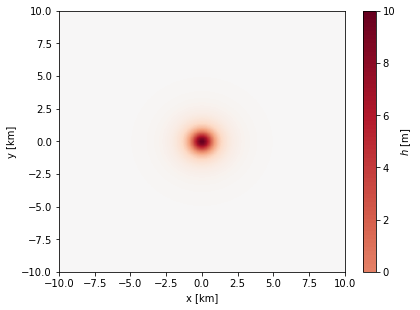

In [12]:
f,ax=plt.subplots(1,1,figsize=(6.4,4.8))

# Plot displacement in left axis
im=ax.imshow(h(Xs,Ys),
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, ys[0]/1e3, ys[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.)
            )
cbar = f.colorbar(im,ax=ax,shrink=1.0,label=r'$h$ [m]')
_ = ax.set(xlim=[-10,10],ylim=[-10,10],xlabel='x [km]',ylabel='y [km]')

## Solve flow problem

In [13]:
%time eta = model.solve('eta',zs)

CPU times: user 5.89 s, sys: 5.23 s, total: 11.1 s
Wall time: 21.8 s


## Visualization

This plot reproduces figure 1 from [Smith (1980)](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.2153-3490.1980.tb00962.x)

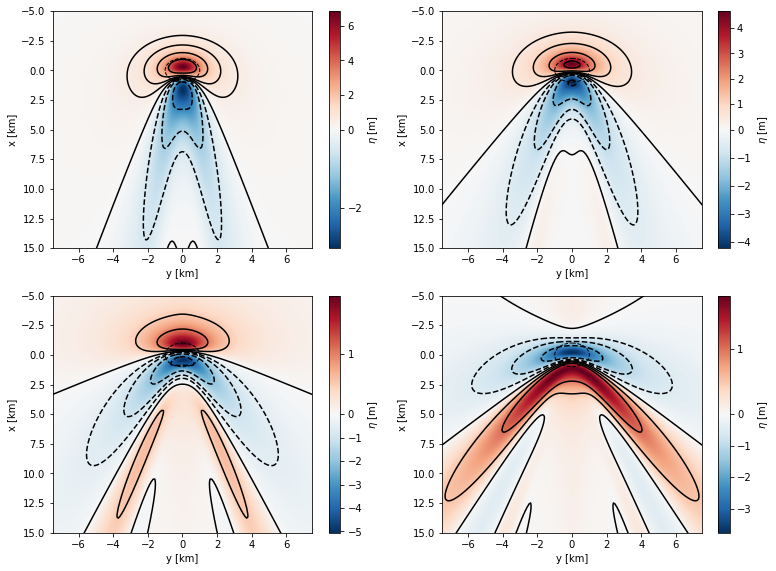

In [14]:
f,ax=plt.subplots(2,2,figsize=(12.8,9.6))

for idx in range(4):
    axs=ax.ravel()
    #Colour plot
    im=axs[idx].imshow(eta[idx,...].T,
                 origin='lower',
                 extent=[ys[0]/1e3, ys[-1]/1e3, xs[0]/1e3, xs[-1]/1e3],
                 aspect='auto',
                 cmap='RdBu_r',
                 norm=TwoSlopeNorm(vcenter=0.))
    cbar = f.colorbar(im,ax=axs[idx],shrink=1.0,label=r'$\eta$ [m]')
    #Contour
    cs = axs[idx].contour(Ys.T/1e3,Xs.T/1e3,eta[idx,...].T,[-4,-2,-1,-0.5,0,0.5,1,2,4],colors='k')
    #axs[idx].clabel(cs, fontsize=9, inline=True)
    # Circle at the origin with radius L
    circle = plt.Circle((0, 0), L/1e3, color='k',linestyle='--',fill=False)
    axs[idx].add_patch(circle)
    #Axes mark up
    _ = axs[idx].set(xlim=[-7.5,7.5],ylim=[-5,15],xlabel='y [km]',ylabel='x [km]')
    #Reverse y axis to go from negative at top to positive at the bottom
    axs[idx].set_ylim(axs[idx].get_ylim()[::-1])